In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images = train_images.astype('float32') / 255.0
test_images =test_images.astype('float32') / 255.0

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

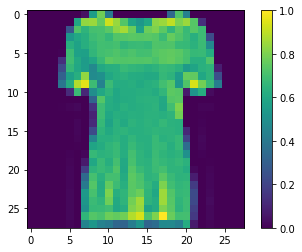

In [5]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

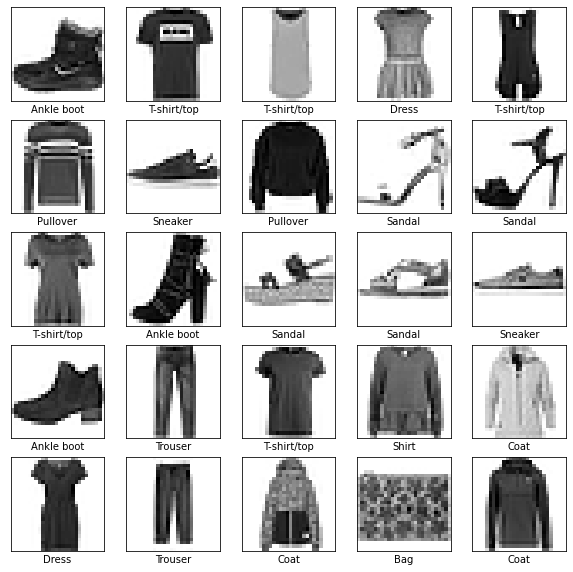

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
val_images, train_images= train_images[:3000], train_images[3000:] 
val_labels, train_labels = train_labels[:3000], train_labels[3000:]

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
history = model.fit(train_images
                    ,train_labels
                    ,epochs=10
                    ,batch_size=512
                    ,validation_data=(val_images,val_labels)
                                                                                                                              
                   )

Epoch 1/10
112/112 [==============================] - 4s 7ms/step - loss: 1.2969 - accuracy: 0.5474 - val_loss: 0.5162 - val_accuracy: 0.8253
Epoch 2/10
112/112 [==============================] - 0s 3ms/step - loss: 0.5508 - accuracy: 0.8090 - val_loss: 0.4232 - val_accuracy: 0.8533
Epoch 3/10
112/112 [==============================] - 0s 3ms/step - loss: 0.4594 - accuracy: 0.8384 - val_loss: 0.3852 - val_accuracy: 0.8660
Epoch 4/10
112/112 [==============================] - 0s 3ms/step - loss: 0.4224 - accuracy: 0.8493 - val_loss: 0.3659 - val_accuracy: 0.8710
Epoch 5/10
112/112 [==============================] - 0s 3ms/step - loss: 0.3997 - accuracy: 0.8592 - val_loss: 0.3644 - val_accuracy: 0.8680
Epoch 6/10
112/112 [==============================] - 0s 3ms/step - loss: 0.3815 - accuracy: 0.8657 - val_loss: 0.3447 - val_accuracy: 0.8773
Epoch 7/10
112/112 [==============================] - 0s 3ms/step - loss: 0.3669 - accuracy: 0.8687 - val_loss: 0.3438 - val_accuracy: 0.8723
Epoch 

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3651 - accuracy: 0.8693

Test accuracy: 0.8693000078201294


In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [13]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

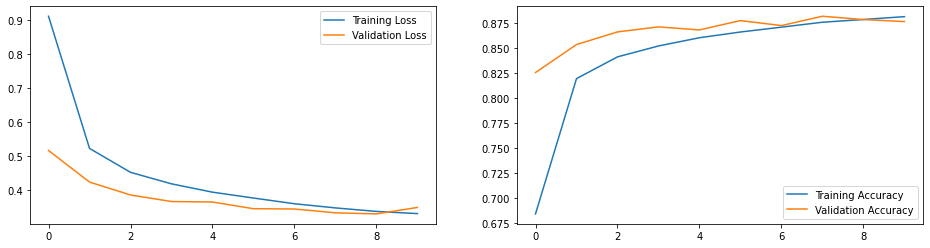

In [14]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [15]:
val_loss, val_acc = model.evaluate(test_images, test_labels)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3651 - accuracy: 0.8693
0.3650765120983124
0.8693000078201294


In [16]:
predictions = model.predict(test_images)

In [17]:
print(predictions)

[[ -4.278477    -2.1602101   -4.4877462  ...   3.2621315   -3.0265718
    7.2545056 ]
 [ -1.0664712   -4.8483324    7.8521123  ...  -8.442124    -4.189991
   -7.14456   ]
 [ -2.6887214   14.595614    -4.286097   ... -11.124948   -14.142559
   -8.37328   ]
 ...
 [  3.0136616   -4.9065456    0.6226455  ...  -2.6632235   10.652143
   -8.129359  ]
 [ -3.9793563    9.93405     -2.975885   ...  -7.588582   -10.478593
   -3.8404193 ]
 [ -3.5949996   -2.984429    -2.6405656  ...   2.2898014   -0.20887338
   -2.2575939 ]]


In [18]:
import numpy as np

print(np.argmax(predictions[0]))

9


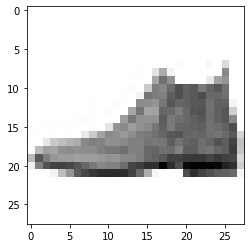

In [19]:
plt.imshow(test_images[0],cmap=plt.cm.binary)
plt.show()

In [20]:
pred_classes = np.argmax(model.predict(train_images), axis=-1)
pred_classes

array([6, 3, 2, ..., 3, 0, 5])

In [21]:
conf_mx = tf.math.confusion_matrix(train_labels, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[5092,    8,  143,  140,    9,    2,  272,    0,   52,    0],
       [   5, 5568,    7,   84,    6,    0,    4,    1,    4,    0],
       [  45,    5, 5145,   39,  354,    1,   88,    0,   33,    0],
       [ 149,   48,   67, 5121,  219,    0,   57,    0,   27,    0],
       [   7,    9,  709,  122, 4677,    0,  135,    0,   38,    0],
       [   0,    0,    0,    0,    0, 5576,    0,   83,    6,   35],
       [ 929,    8, 1012,  113,  487,    0, 3062,    0,   91,    0],
       [   0,    0,    0,    0,    0,   92,    0, 5273,    8,  315],
       [   6,    1,   19,   10,   16,    6,   12,   14, 5627,    2],
       [   0,    0,    0,    0,    0,   30,    0,   77,    1, 5597]],
      dtype=int32)>

In [22]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

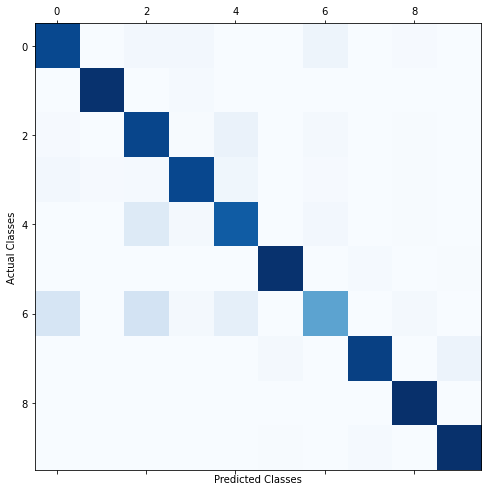

In [23]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,  fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()